In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
import re

In [2]:
#in this data,we have one independent variable 'temp' and one dependent variable 'revenue'
#you have to bulid a decisiontreeregressor to study the relationship between the two variables of the icecream shop
#then predict the revenue for the ice cream shop based on the temperature on a particular day

In [3]:
#import the dataset
df=pd.read_csv(r"C:\Users\HP\Desktop\SHRAVANI\CSV_files\IceCreamData.csv")
df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [4]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [5]:
df.tail()   # 500 datapoints because it start with a 0 

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [6]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [8]:
df.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

Text(0.5, 1.0, 'Temperature vs Reveneue')

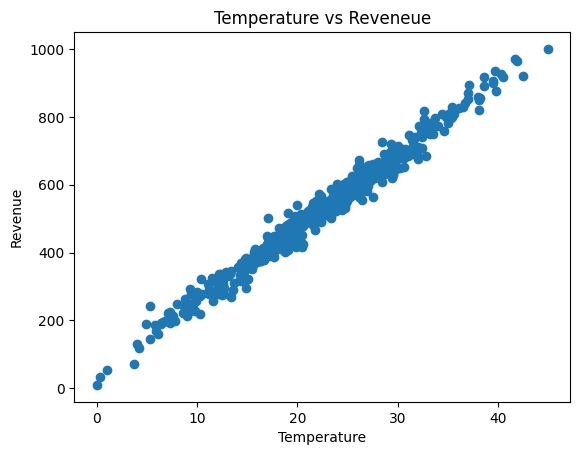

In [9]:
plt.scatter(df.Temperature, df.Revenue)
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.title('Temperature vs Reveneue')

In [10]:
df.corr()

,Temperature,Revenue
Temperature,1.000000,0.989802
Revenue,0.989802,1.000000


<Axes: >

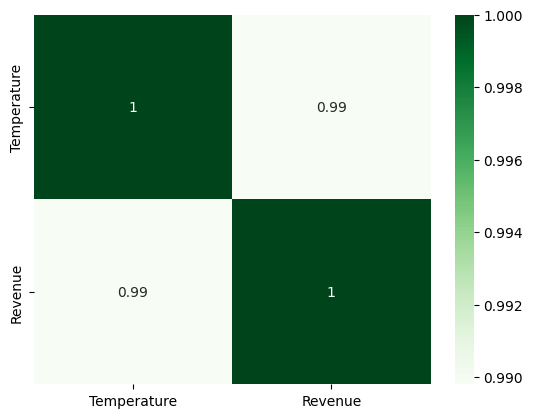

In [11]:
sns.heatmap(df.corr(),annot=True, cmap='Greens')  #strong positive correlation

<Axes: >

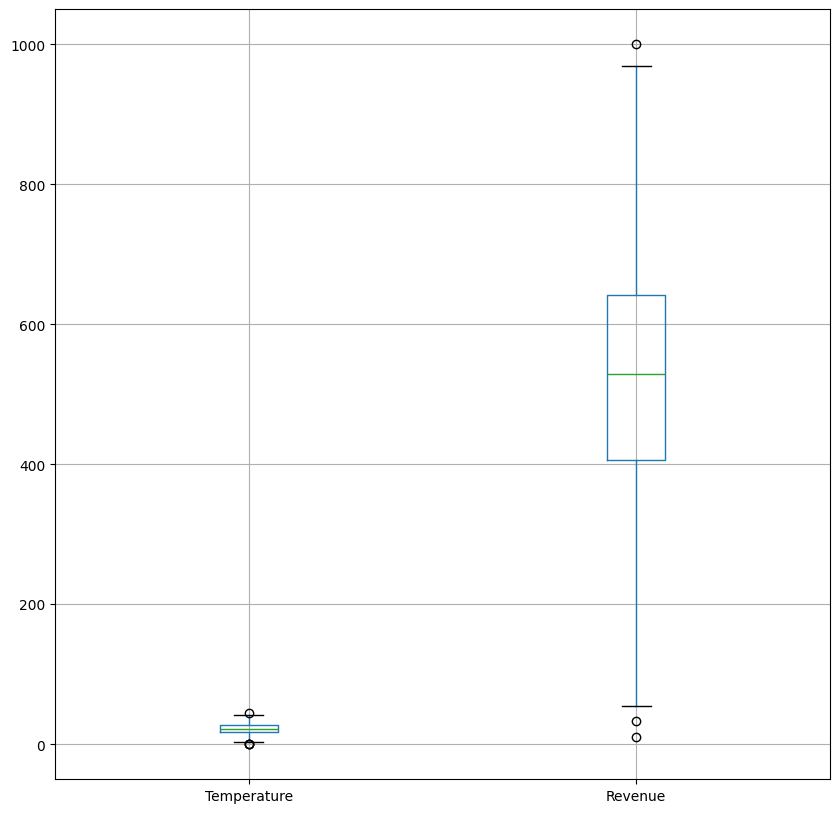

In [12]:
#finding if there is any outlier then by plotting a boxplot
#box tells the percentage of data lies
plt.figure(figsize=(10,10))
df.boxplot()


In [13]:
#ml--> splitting of the data
x=np.array(df.Temperature.values)
y=np.array(df.Revenue.values)

In [14]:
from sklearn.model_selection import train_test_split 

In [15]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [16]:
len(x_test)

100

In [17]:
#choosing the model
regressor=DecisionTreeRegressor()

In [18]:
len(y_train)

400

In [19]:
#train the model
regressor.fit(x_train.reshape(-1, 1),y_train.reshape(-1, 1))

DecisionTreeRegressor()

In [20]:
#testing the model
y_pred=regressor.predict(x_test.reshape(-1,1))
y_pred

array([448.9304429 , 594.8048712 , 565.8749999 , 641.0253891 ,
       539.5277397 , 118.8121496 , 654.8949545 , 653.9867356 ,
       427.1383693 , 372.9906055 , 145.6253019 , 755.8183987 ,
       851.3430963 , 750.4447328 , 534.6228653 , 322.9839774 ,
       341.8593529 , 535.8667293 , 643.0909437 , 618.2357655 ,
       571.4342569 , 477.3151879 , 118.8121496 , 643.0909437 ,
       603.2329422 , 460.4025002 , 594.1103517 , 396.9356482 ,
       246.7871609 , 648.5546445 , 469.9090332 , 170.2377561 ,
       665.6726764 , 512.5881071 , 563.3816326 , 477.3151879 ,
       476.7945251 , 351.2888691 , 297.4991195 , 476.7945251 ,
       539.6880057 , 697.1474728 , 432.8197952 , 696.7166402 ,
       366.2477143 , 654.8949545 , 498.2521461 , 651.8615363 ,
       521.6728037 , 516.5486011 , 697.8339862 , 819.1175879 ,
       507.35681   , 850.2469822 , 666.1368355 , 850.2469822 ,
       550.4412717 , 473.6043349 , 607.5421478 , 452.6263171 ,
       690.7892959 , 451.4507843 , 539.6880057 , 599.11

In [21]:
#comparing the y_test with y_pred
comp=pd.DataFrame({'actual values':y_test.reshape(-1),'predicted values':y_pred.reshape(-1)})      
comp                   

,actual values,predicted values
0,456.524341,448.930443
1,540.977511,594.804871
2,572.672047,565.875000
3,682.808566,641.025389
4,534.364539,539.527740
...,...,...
95,55.390338,32.546619
96,429.435702,506.222379
97,563.250987,574.710649
98,473.499631,477.315188


Text(0, 0.5, 'y_test/y_pred')

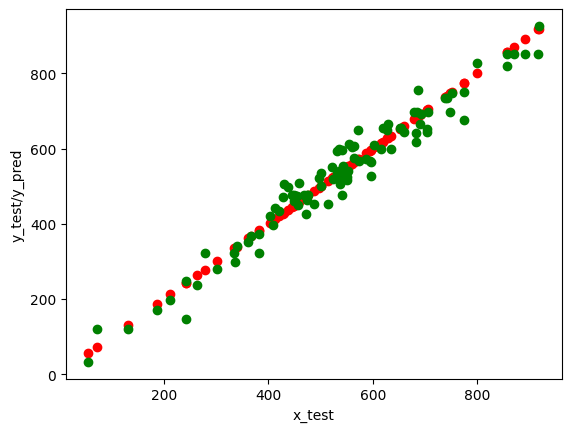

In [22]:
plt.scatter(y_test,y_test,color='red')
plt.scatter(y_test,y_pred,color='green')
plt.xlabel('x_test')
plt.ylabel('y_test/y_pred')

<Axes: >

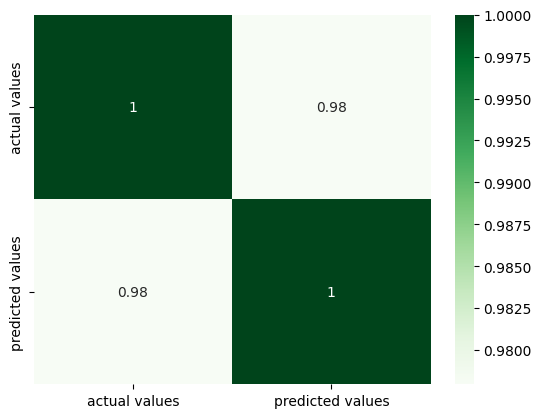

In [23]:
sns.heatmap(comp.corr(),annot=True,cmap='Greens')

<Axes: >

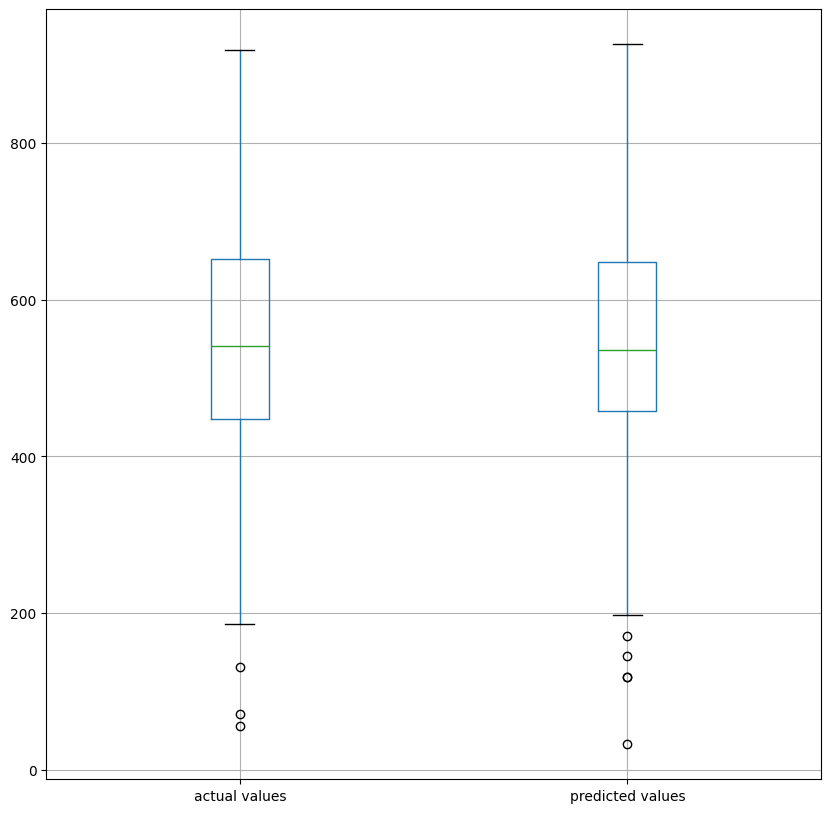

In [24]:
plt.figure(figsize=(10,10))
comp.boxplot()

In [25]:
#check the performance
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [26]:
r2_score(y_test,y_pred)

0.9559527422994305

In [27]:
mean_squared_error(y_test,y_pred)

1340.0218652558594

In [28]:
mean_absolute_error(y_test,y_pred)

28.6792461561